In [249]:
import pandas as pd
from getters.get_data import GetData

Instanciando objeto e realizando o download dos dados a partir de código disponível em getters/get_data.py

In [250]:
get = GetData('https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv')
get.get_data()

In [251]:
# Importando os dados para um dataframe
df = pd.read_csv('data/serie_historica.csv', sep=';')

Realizando tratamento dos dados obtidos

In [252]:
df.head()

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"


In [253]:
# Segmentando sexo e raça
# Importante notar que apesar de segmentar a raça, a coluna ainda define o sexo pelo pronome
df['sexo'] = df['sexo_raça'].apply(lambda x: x.split(' ')[0])
df['raca'] = df['sexo_raça'].apply(lambda x: x.split(' ')[1])

In [254]:
# Para realmente desagregar a raça do sexo, é necessário normalizar as categorias para branco x negro
def agrega_raca(valor):

    if 'Branc' in valor:
        return 'Brancx'
        
    return 'Negrx'

In [255]:
df['raca_binaria'] = df['raca'].apply(lambda x: agrega_raca(x))

In [256]:
# Transformando valor liquido em float
df['liquido'] = df['liquido'].apply(lambda x: float(x.replace(',', '.')))

In [257]:
# Limpando colunas não utilizadas
df.drop(columns=['sexo_raça','Unnamed: 0'], inplace=True)

In [258]:
df.head()

,ano,liquido,sexo,raca,raca_binaria
0,1999,6527.2,Homem,Branco,Brancx
1,1999,4768.7,Homem,Negro,Negrx
2,1999,5261.6,Mulher,Branca,Brancx
3,1999,4010.0,Mulher,Negra,Negrx
4,2000,5690.3,Homem,Branco,Brancx


## Análise Exploratória dos dados

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

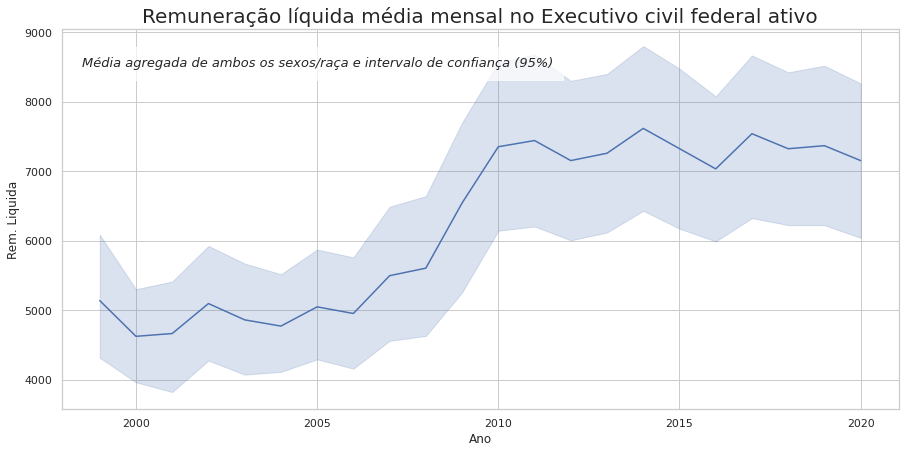

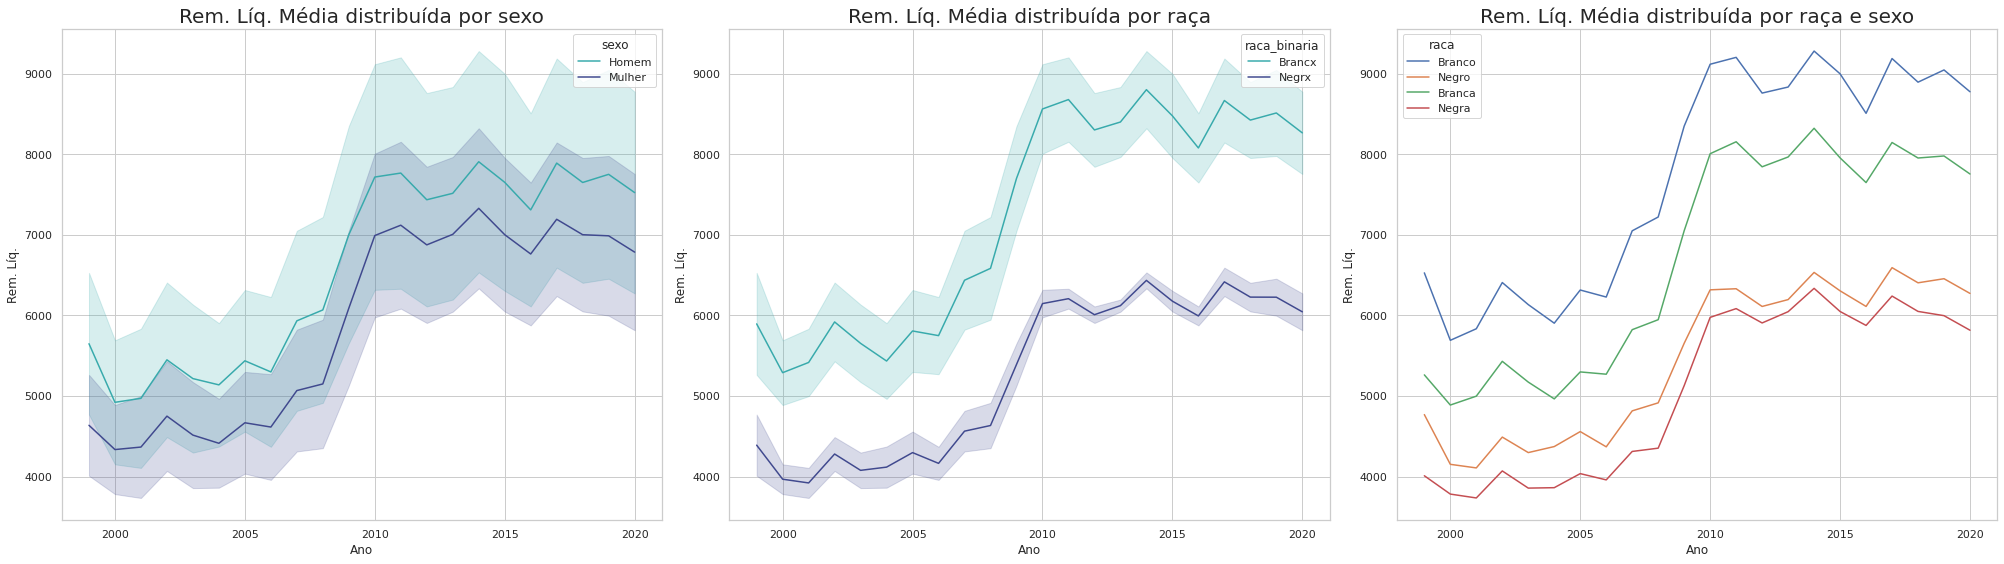

In [260]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
#plotting a series of liquido ano-mes-valor
sns.lineplot(x="ano", y="liquido", data=df)
plt.ylabel('Rem. Liquida')
plt.xlabel('Ano')
plt.title("Remuneração líquida média mensal no Executivo civil federal ativo", fontsize=20)
plt.text(1998.5,8500,'Média agregada de ambos os sexos/raça e intervalo de confiança (95%)',style='italic',
bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 10}, fontsize=13)
plt.show(1)


fig, ax = plt.subplots(1, 3, figsize=(28,8))
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
ax[0].set_title("Rem. Líq. Média distribuída por sexo", fontsize=20)
ax[0].set_ylabel('Rem. Líq.')
ax[0].set_xlabel('Ano')

sns.lineplot(data=df, x="ano", y="liquido", hue="raca_binaria", ax=ax[1], palette=palette)
ax[1].set_title("Rem. Líq. Média distribuída por raça", fontsize=20)
ax[1].set_ylabel('Rem. Líq.')
ax[1].set_xlabel('Ano')


sns.lineplot(data=df, x="ano", y="liquido", hue="raca", ax=ax[2])
ax[2].set_title("Rem. Líq. Média distribuída por raça e sexo", fontsize=20)
ax[2].set_ylabel('Rem. Líq.')
ax[2].set_xlabel('Ano')
fig.tight_layout()
plt.show()

In [261]:
df[['liquido']].describe()

,liquido
count,88.000000
mean,6245.989773
std,1581.514317
min,3734.500000
25%,4989.050000
50%,6097.050000
75%,7674.000000
max,9279.100000


Observando distância na remuneração de Brancos e negros pelo tempo

In [262]:
brancos_x_negros=df.groupby(['ano','raca_binaria'], as_index=False).mean()
brancos_x_negros['diffs'] = brancos_x_negros['liquido'].diff()
mask = brancos_x_negros.ano != brancos_x_negros.ano.shift(1)
brancos_x_negros['diffs'][mask] = np.nan
brancos_x_negros=brancos_x_negros.groupby('ano', as_index=False).last()


/tmp/ipykernel_3697/2349117612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brancos_x_negros['diffs'][mask] = np.nan


In [263]:
brancos_x_negros.head()

,ano,raca_binaria,liquido,diffs
0,1999,Negrx,4389.35,-1505.05
1,2000,Negrx,3967.10,-1321.70
2,2001,Negrx,3920.85,-1494.80
3,2002,Negrx,4279.65,-1638.70
4,2003,Negrx,4077.05,-1575.55


In [290]:
df.groupby('raca_binaria')['liquido'].mean()

raca_binaria
Brancx    7228.568182
Negrx     5263.411364
Name: liquido, dtype: float64

In [264]:
homens_x_mulheres=df.groupby(['ano','sexo'], as_index=False).mean()
homens_x_mulheres['diffs'] = homens_x_mulheres['liquido'].diff()
mask = homens_x_mulheres.ano != homens_x_mulheres.ano.shift(1)
homens_x_mulheres['diffs'][mask] = np.nan
homens_x_mulheres=homens_x_mulheres.groupby('ano', as_index=False).last()


/tmp/ipykernel_3697/3692285442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homens_x_mulheres['diffs'][mask] = np.nan


In [265]:
homens_x_mulheres.head()

,ano,sexo,liquido,diffs
0,1999,Mulher,4635.8,-1012.15
1,2000,Mulher,4334.9,-586.10
2,2001,Mulher,4366.0,-604.50
3,2002,Mulher,4749.7,-698.60
4,2003,Mulher,4514.3,-701.05


In [289]:
df.groupby('sexo')['liquido'].mean()

sexo
Homem     6599.113636
Mulher    5892.865909
Name: liquido, dtype: float64

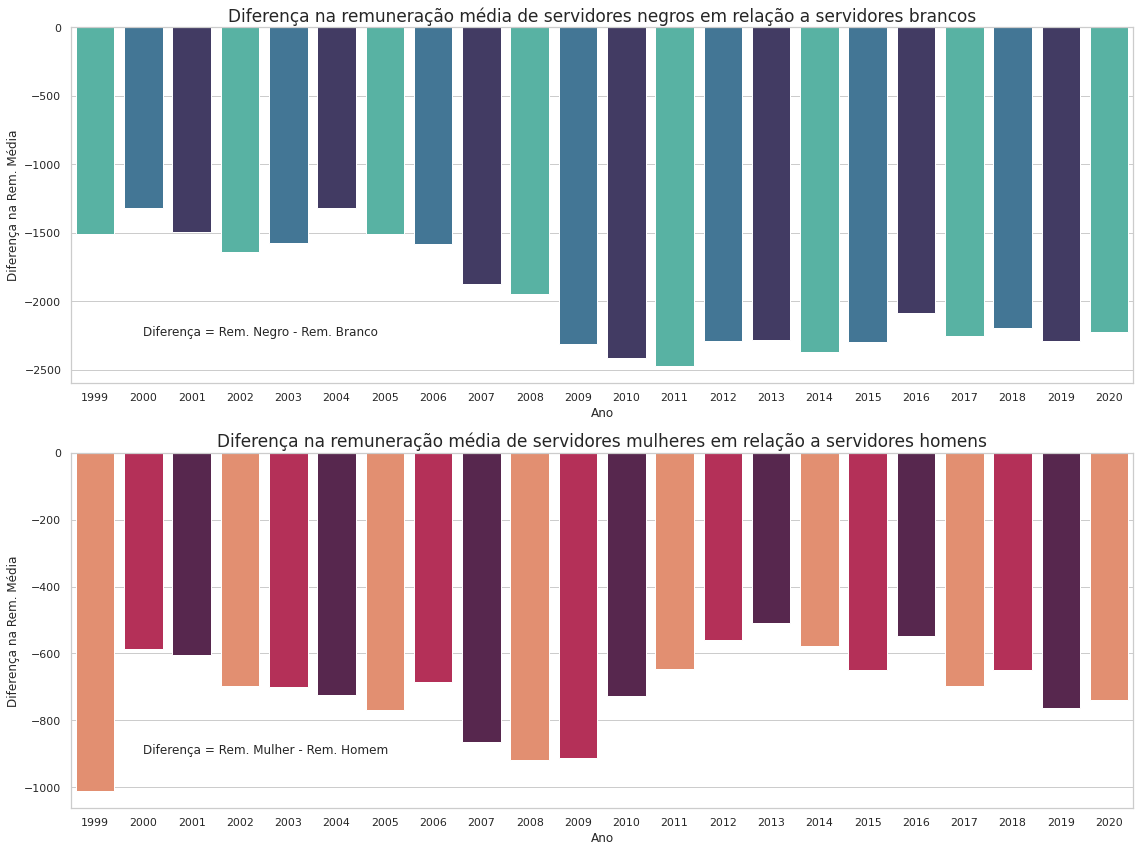

In [266]:
fig, ax = plt.subplots(2, figsize=(16,12))
palette = sns.color_palette("mako_r", 3)

sns.barplot(data=brancos_x_negros, y='diffs', x='ano', palette=palette, ax=ax[0])
ax[0].set_title('Diferença na remuneração média de servidores negros em relação a servidores brancos', fontsize=17)
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Diferença na Rem. Média')
ax[0].text(1,-2250,'Diferença = Rem. Negro - Rem. Branco', fontsize=12)

palette = sns.color_palette("rocket_r", 3)
sns.barplot(data=homens_x_mulheres, y='diffs', x='ano', palette=palette, ax=ax[1])
ax[1].set_title('Diferença na remuneração média de servidores mulheres em relação a servidores homens', fontsize=17)
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Diferença na Rem. Média')
ax[1].text(1,-900,'Diferença = Rem. Mulher - Rem. Homem', fontsize=12) #add text
fig.tight_layout()
plt.show()

## Iniciando modelo de regressão 

Irei utilizar o algoritmo de regressão Gradient Boost (XGBoost) para prever comportamento da Remuneração Média com base na série temporal

In [267]:
#pip install xgboost

In [268]:
# Transformando variáveis categóricas em numéricas
df_mod = df.copy()
df_mod['homem'] = df_mod['sexo'].apply(lambda x: 1 if x == 'Homem' else 0)
df_mod['mulher'] = df_mod['sexo'].apply(lambda x: 1 if x == 'Mulher' else 0)
df_mod['branco'] = df_mod['raca_binaria'].apply(lambda x: 1 if x == 'Brancx' else 0)
df_mod['negro'] = df_mod['raca_binaria'].apply(lambda x: 1 if x == 'Negrx' else 0)

In [269]:
# removendo colunas desnecessárias
df_mod.drop(columns=['sexo','raca','raca_binaria'], inplace=True)

In [271]:
# adicionando coluna de série temporal no dataframe
temp = df_mod.groupby('ano', as_index=False).last()[['ano']]
temp['t'] = [i for i in range(len(temp))]
df_mod=df_mod.merge(temp, on='ano')

In [302]:
df_mod.head()

,ano,liquido,homem,mulher,branco,negro,t
0,1999,6527.2,1,0,1,0,0
1,1999,4768.7,1,0,0,1,0
2,1999,5261.6,0,1,1,0,0
3,1999,4010.0,0,1,0,1,0
4,2000,5690.3,1,0,1,0,1


In [273]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [274]:
X, y = df_mod[['t','homem','mulher','branco', 'negro']], df_mod['liquido']

In [275]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [301]:
X_test.head()

,t,homem,mulher,branco,negro
4,1,1,0,1,0
84,21,1,0,1,0
56,14,1,0,1,0
35,8,0,1,0,1
45,11,1,0,0,1


In [277]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.3,
                max_depth = 9, alpha = 16, n_estimators = 12)

In [278]:
xg_reg.fit(X_train,y_train)

# Analisando predições para o dataset de test
preds = xg_reg.predict(X_test)

In [279]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 286.161340


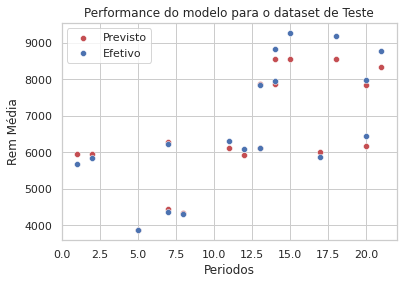

In [312]:
sns.scatterplot(x=X_test.t, y=preds, color='r', label='Previsto')
sns.scatterplot(x=X_test.t, y=y_test, label='Efetivo')
#sns.lineplot(X_test)
plt.title('Performance do modelo para o dataset de Teste')
plt.xlabel('Periodos')
plt.ylabel('Rem Média')
plt.legend()
plt.show()

O modelo conseguiu performar com alta acurácia para o dataset de teste.

Para comparação, vou plotar o modelo com o dataset original e verificar a linha gerada

In [303]:
preds_2 = xg_reg.predict(X)

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


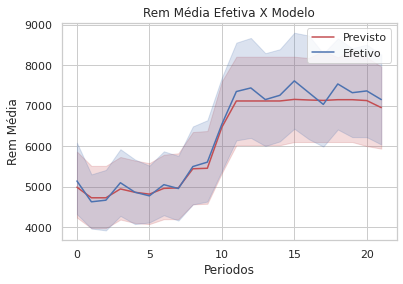

In [346]:
sns.lineplot(x=X.t, y=preds_2, color='r', label='Previsto')
sns.lineplot(x=X.t, y=y, label='Efetivo')
#sns.lineplot(X_test)
plt.title('Rem Média Efetiva X Modelo')
plt.xlabel('Periodos')
plt.ylabel('Rem Média')
plt.legend()
plt.show()

### Realizando previsão para próximos períodos

In [328]:
d = {'t': [22, 22, 22, 22], 'homem':[1, 1, 0, 0], 'mulher':[0, 0, 1, 1], 'branco':[1, 0, 1, 0], 'negro':[0, 1, 0, 1]}
futuro = pd.DataFrame(data=d)

In [330]:
# Dataframe com período de 2021 e 2022
futuro

,t,homem,mulher,branco,negro
0,22,1,0,1,0
1,22,1,0,0,1
2,22,0,1,1,0
3,22,0,1,0,1


In [331]:
preds_3 = xg_reg.predict(futuro)

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [337]:
futuro['previsao'] = preds_3

In [349]:
# A previsão da remuneração de cada categoria para o período de 2021:
futuro

,t,homem,mulher,branco,negro,previsao
0,22,1,0,1,0,8330.258789
1,22,1,0,0,1,6059.328125
2,22,0,1,1,0,7608.198730
3,22,0,1,0,1,5825.627441


In [343]:
# A média de remuneração para o período de 2021:
futuro.previsao.mean()

6955.853

### Analisando importância dos parâmetros

In [282]:
# Plot the feature importance
feature_importance_df = pd.DataFrame(list(zip(X.columns, xg_reg.feature_importances_)),
                                        columns=['feature', 'fscore'])

In [283]:
feature_importance_df.sort_values('fscore', ascending=False)

,feature,fscore
3,branco,0.689192
4,negro,0.137884
0,t,0.094219
2,mulher,0.056172
1,homem,0.022533


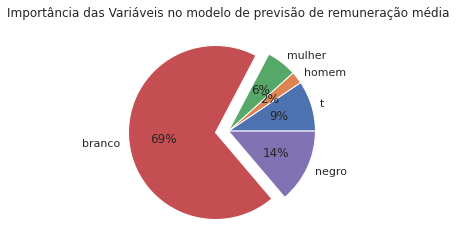

In [288]:

palette = sns.color_palette()
explode = [0, 0, 0, 0.15, 0]
plt.pie(feature_importance_df.fscore, labels=feature_importance_df.feature, autopct='%.0f%%', explode=explode, colors=palette)
plt.title('Importância das Variáveis no modelo de previsão de remuneração média')
plt.show()
